<a href="https://colab.research.google.com/github/shuangquan-li-con/ECON5200-37499-Applied-Data-Analytics-in-Economics/blob/main/In_class_note_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np

In [58]:
np.random.randint(60,101)

62

In [59]:
grades = np.concatenate([np.random.randint(60,75,40),np.random.randint(75,85,100),np.random.randint(85,101,60)])
grades

array([ 63,  61,  64,  70,  67,  68,  64,  67,  69,  65,  72,  71,  73,
        60,  67,  60,  62,  61,  69,  73,  66,  74,  64,  73,  63,  71,
        69,  65,  70,  74,  60,  70,  67,  66,  70,  63,  70,  71,  66,
        64,  81,  79,  84,  80,  77,  84,  83,  84,  84,  80,  84,  81,
        84,  77,  80,  76,  80,  82,  82,  77,  80,  76,  79,  81,  75,
        84,  79,  79,  82,  83,  80,  76,  78,  78,  76,  81,  82,  83,
        78,  81,  75,  79,  82,  81,  75,  82,  75,  77,  83,  75,  83,
        83,  77,  78,  82,  82,  80,  76,  81,  78,  80,  79,  77,  78,
        76,  76,  77,  81,  82,  77,  79,  83,  77,  81,  76,  84,  82,
        80,  82,  82,  84,  84,  78,  80,  82,  80,  78,  78,  80,  75,
        75,  80,  80,  76,  83,  83,  84,  77,  77,  81,  91,  94,  98,
        90,  91, 100,  90,  86, 100,  89,  94,  99,  96,  91,  89,  92,
        86,  99,  95, 100, 100,  86,  93,  91, 100,  89,  97,  90,  90,
        98,  97,  86,  86,  89,  93,  95,  91,  86,  93,  87,  8

In [60]:
import pandas as pd

df = pd.DataFrame(grades,columns=['grades'])
pop_mean = df['grades'].mean()
print("Poplulation Mean:",pop_mean)
df.describe()

Poplulation Mean: 80.935


,grades
count,200.000000
mean,80.935000
std,9.560743
min,60.000000
25%,76.000000
50%,81.000000
75%,86.250000
max,100.000000


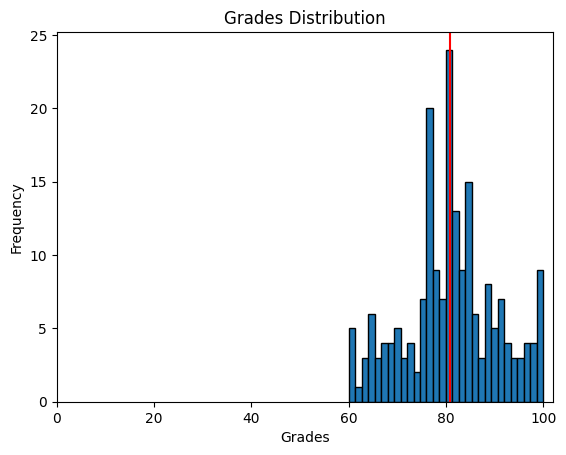

In [61]:
import matplotlib.pyplot as plt
plt.hist(df, bins = 30, edgecolor = 'k')
plt.axvline(pop_mean, color = 'red')
plt.title("Grades Distribution")
plt.xlabel("Grades")
plt.ylabel("Frequency")
plt.xlim(xmin=0)
plt.show()

In [62]:
sample_3 = df['grades'].sample(n=3, replace = True)
print(sample_3)
print("Sample Mean:",sample_3.mean())
Sampling_error_3 = sample_3.mean() - pop_mean
print("Sampling Error:",Sampling_error_3)

180    85
162    93
139    81
Name: grades, dtype: int64
Sample Mean: 86.33333333333333
Sampling Error: 5.398333333333326


In [63]:
biased_pool = df[df['grades'] > 80]

In [64]:
sample_biased_3 = biased_pool['grades'].sample(n=3, replace = True, weights=df['grades'] )
print(sample_biased_3)
print("Biased Sample Mean:",sample_biased_3.mean())
Sampling_error_biased_3 = sample_biased_3.mean() - pop_mean
print("Biased Sampling Error:",Sampling_error_biased_3)

181     99
146     90
145    100
Name: grades, dtype: int64
Biased Sample Mean: 96.33333333333333
Biased Sampling Error: 15.398333333333326


In [65]:
sample_mean =[]

       grades_sample_mean
count         1000.000000
mean            80.972733
std              1.687492
min             75.400000
25%             79.833333
50%             81.000000
75%             82.141667
max             85.666667


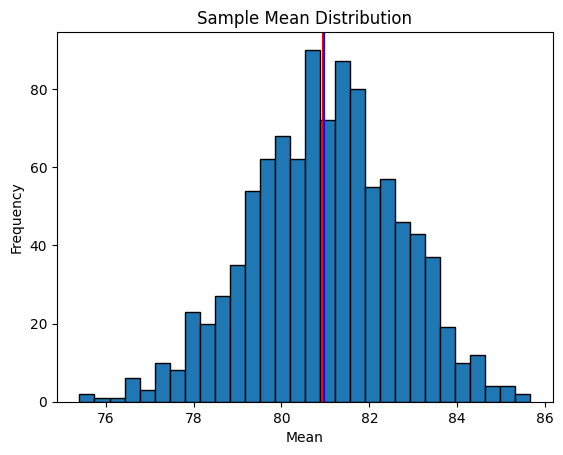

In [66]:
for i in range(1000):
  sample = df['grades'].sample(n=30, replace = True)
  sample_mean.append(sample.mean())

df_sample_mean = pd.DataFrame(sample_mean,columns=['grades_sample_mean'])

print("="*80)
print(df_sample_mean.describe())
print("="*80)
plt.hist(df_sample_mean['grades_sample_mean'], bins = 30, edgecolor = 'k')
plt.title("Sample Mean Distribution")
plt.axvline(pop_mean, color = 'red')
plt.axvline(df_sample_mean['grades_sample_mean'].mean(), color = 'blue')
plt.xlabel("Mean")
plt.ylabel("Frequency")
plt.show()

# **With a known population mean and standard deviation.**

In [67]:
s_e_sample_3_1k = df.std() / np.sqrt(3)
print(s_e_sample_3_1k)

grades    5.519898
dtype: float64


In [68]:
s_e_sample_30_1k = df.std() / np.sqrt(30)
print(s_e_sample_30_1k)

grades    1.745545
dtype: float64


In [69]:
m_e = 1.96 * s_e_sample_30_1k
m_e

,0
grades,3.421268


In [70]:
upper_bound = df_sample_mean['grades_sample_mean'].mean() + 1.96*s_e_sample_30_1k
upper_bound

,0
grades,84.394001


In [71]:
lower_bound = df_sample_mean['grades_sample_mean'].mean() - 1.96*s_e_sample_30_1k
lower_bound

,0
grades,77.551465


In [72]:
C_I_95 = [f"{lower_bound['grades']:.2f}",f"{upper_bound['grades']:.2f}"]
print(C_I_95)

['77.55', '84.39']


In [73]:
import scipy.stats as stats

In [74]:
ci = stats.norm.interval(0.95,loc=df_sample_mean['grades_sample_mean'].mean(),scale=s_e_sample_30_1k)
ci

(array([77.55152812]), array([84.39393855]))

N=30,but only 1 study


In [75]:
sample_30=df['grades'].sample(n=30,replace = True)
print(sample_30.mean())

82.43333333333334


In [76]:
z_score=(sample_30.mean() - pop_mean) / (df.std()/np.sqrt(30))
print(z_score)

grades    0.858376
dtype: float64


In [77]:
p_value = stats.norm.sf(z_score)*2
print(p_value)
if p_value < 0.05:
  print("reject null hypothesis")
else:
  print("accept null hypothesis")

[0.39068505]
accept null hypothesis


H0 Test


In [78]:
#Setup
null_mean = 35.00
sample_mean = 25.53
n_pro = 203
std_dev = 8.5

In [80]:
# Sim
np.random.seed(41)
pop_size = 100000
pop_data = np.random.normal(null_mean,std_dev,pop_size)
pro_sample = np.random.normal(sample_mean,std_dev,n_pro)

In [89]:
t_stat, p_val = stats.ttest_1samp(pro_sample,null_mean)
print("T-score",t_stat)
print(f"P-value,{p_val:.20f}")
print(p_val)
if p_val < 0.05:
  print("reject null hypothesis")
else:
  print("accept null hypothesis")

T-score -15.67236131632247
P-value,0.00000000000000000000
9.454974671091419e-37
reject null hypothesis


In [82]:
t_stat

np.float64(-15.67236131632247)

In [83]:
p_val

np.float64(9.454974671091419e-37)

9.454974671091419e-37
reject null hypothesis


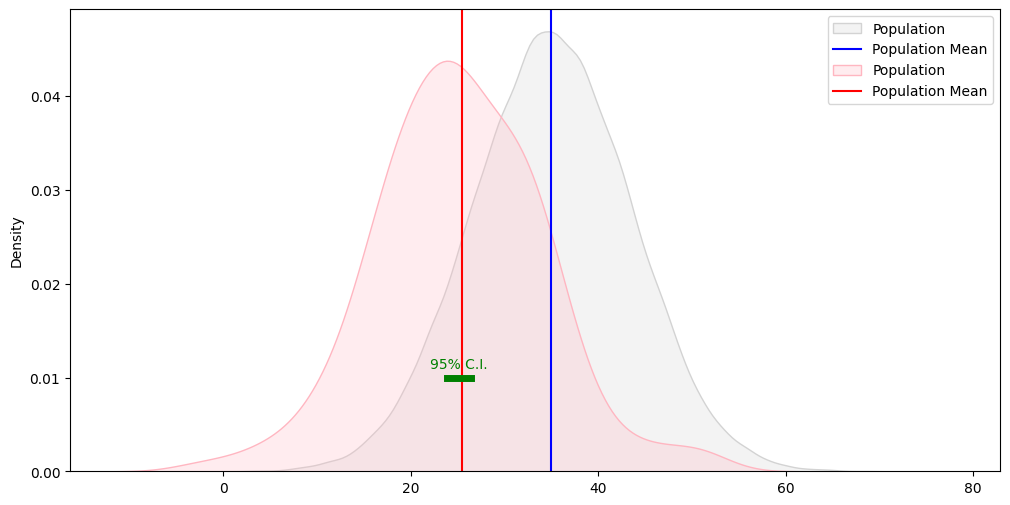

In [114]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.kdeplot(pop_data,fill=True,color='lightgrey',label='Population')
plt.axvline(null_mean,color='blue',label='Population Mean')

sns.kdeplot(pro_sample,fill=True,color='lightpink',label='Population')
plt.axvline(sample_mean,color='red',label='Population Mean')
plt.legend()
plt.plot([ci_low,ci_high],[0.01,0.01],color='green',linewidth=5,label="95% C.I.")
plt.text(((ci_low+ci_high)/2),0.011,"95% C.I.",color="green",ha='center')
plt.show()

In [97]:
ci_low,ci_high = stats.t.interval(0.95,
                  df=len(pro_sample)-1,
                  loc=np.mean(pro_sample),
                         scale=stats.sem(pro_sample))

In [100]:
ci_low

np.float64(23.92497018635446)

In [101]:
ci_high

np.float64(26.40029569712505)

Text(25.162632941739755, 0.01, '95%')

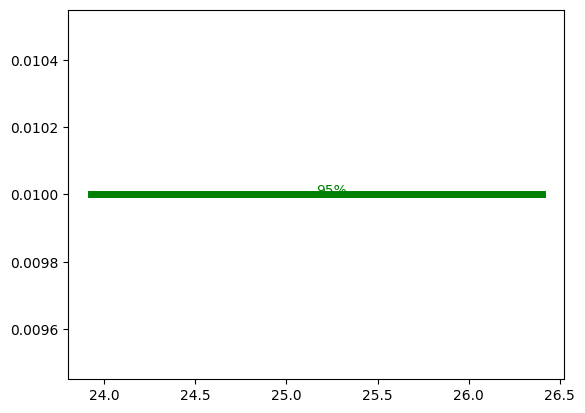

In [111]:
plt.plot([ci_low,ci_high],[0.01,0.01],color='green',linewidth=5,label="95% C.I.")
plt.text(((ci_low+ci_high)/2),0.01,"95%",color="green")

In [115]:
df_salon = pd.read_csv("/content/hair_salon_transactions.csv")

In [116]:
df_salon

,Salon,Gender,Price
0,Newbury Street Salon,Female,48.04
1,Fenway Barbers,Female,32.14
2,South End Studio,Male,43.93
3,Beacon Hill Salon,Female,48.55
4,Roxbury Cuts,Female,69.27
...,...,...,...
4195,Northeastern Salon,Male,59.97
4196,Back Bay Hair,Female,56.53
4197,Chinatown Barber,Male,37.42
4198,Great Clips,Female,27.78


In [123]:
salon_diff_price = df_salon.groupby(['Salon','Gender'])['Price'].mean().unstack()
salon_diff_price["Difference"]=salon_diff_price["Female"] - salon_diff_price["Male"]
salon_diff_price

Gender,Female,Male,Difference
Salon,,,
Back Bay Hair,57.381031,42.304103,15.076928
Beacon Hill Salon,49.095982,48.834872,0.261110
Boston Barber,44.092692,33.879310,10.213382
Cambridge Cuts,52.908598,43.103030,9.805568
Campus Cuts,34.951789,30.097629,4.854161
Chinatown Barber,47.760673,43.175638,4.585035
Downtown Cuts,23.962182,21.113363,2.848819
Fenway Barbers,32.832396,29.846639,2.985757
Floyd's 99,39.889223,37.758365,2.130858


In [126]:
df_mobility=pd.read_csv("/content/immigrant_mobility_study.csv")

In [128]:
df_mobility['Mobility'] = df_mobility['Daughter_Pct']-df_mobility['Mother_Pct']

In [130]:
df_mobility

,Pair_ID,Mother_Year,Mother_Zip,Mother_Pct,Daughter_Year,Daughter_Zip,Daughter_Pct,Mobility
0,1,1970,95266,50.9,2000,94258,50.7,-0.2
1,2,1970,91548,39.5,2000,92740,67.6,28.1
2,3,1970,94019,53.7,2000,90979,62.4,8.7
3,4,1970,94205,69.4,2000,90518,80.7,11.3
4,5,1970,91369,37.8,2000,94994,12.8,-25.0
...,...,...,...,...,...,...,...,...
4116,4117,1970,91113,37.6,2000,92790,15.4,-22.2
4117,4118,1970,91292,8.0,2000,94262,53.1,45.1
4118,4119,1970,91162,33.8,2000,92253,12.2,-21.6
4119,4120,1970,91030,23.3,2000,94974,32.1,8.8


In [134]:
t_stat,p_val = stats.ttest_1samp(df_mobility['Mobility'],0)
print("T-score",t_stat)
print(f"P-value,{p_val:.20f}")
print(p_val)
if p_val < 0.05:
  print("Siginificant, Reject null hypothesis")
else:
  print("Accept null hypothesis")

T-score 8.730455348791505
P-value,0.00000000000000000363
3.626000170977397e-18
Siginificant, Reject null hypothesis


In [133]:
df_mobility.mean()

,0
Pair_ID,2061.000000
Mother_Year,1970.000000
Mother_Zip,93055.913856
Mother_Pct,42.393739
Daughter_Year,2000.000000
Daughter_Zip,93066.487503
Daughter_Pct,45.610726
Mobility,3.216986
